In [5]:
%run ../common_utils.py

In [6]:
def load_data(val_data=False,path=None,cat_unknown=False):
    train, test, metadata = load_all_data(path=path)
    nonCategorical, categorical = get_cat_and_non_cat_data(metadata)
    all_features = list(train.columns)
    all_features.remove('price')
    numerical_features = ['area_total','area_kitchen','area_living','floor','rooms','ceiling',
        'bathrooms_shared','bathrooms_private','balconies','loggias','phones','building_id','constructed','stories']
    categorical_to_numerical(train, ['street','address'])
    categorical_to_numerical(test, ['street','address'])
    if not val_data:
        X_train, y_train, test_labels = pre_process_numerical(features = all_features, numerical_features = numerical_features, train = train, test = test,
                            outliers_value=7, val_data=val_data, val_split=0.2, random_state=42, scaler="std",
                            add_R="True", add_rel_height="True", droptable=[],
                            one_hot_encode=False, cat_features=categorical, drop_old=True,categorical_unknown=cat_unknown)
        y_train_log = np.log(y_train)
        return X_train, y_train, y_train_log, test_labels
    else:
        X_train, y_train, X_test, y_test, test_labels = pre_process_numerical(features = all_features, numerical_features = numerical_features, train = train, test = test,
                            outliers_value=7, val_data=val_data, val_split=0.2, random_state=42, scaler="std",
                            add_R="True", add_rel_height="True", droptable=[],
                            one_hot_encode=False, cat_features=categorical, drop_old=True,categorical_unkown=cat_unknown)
        y_train_log = np.log(y_train)
        return X_train, y_train, y_train_log, X_test, y_test, test_labels

In [8]:
X_train, y_train, y_train_log, test_labels = load_data(cat_unknown=True)

nan to extra unknown category
Std


C:\ntnuProjects\TDT4173-ML\common_utils.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[feature] = labels[feature].fillna(unknown_category)


In [10]:
x = X_train
y = y_train
test = test_labels

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


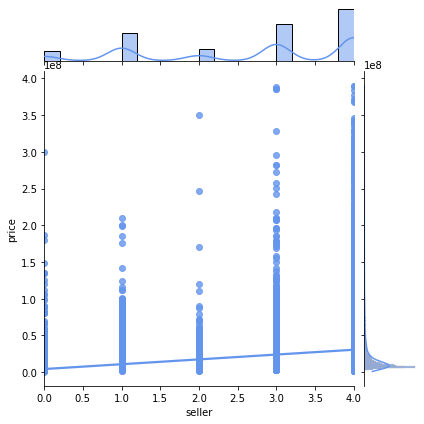

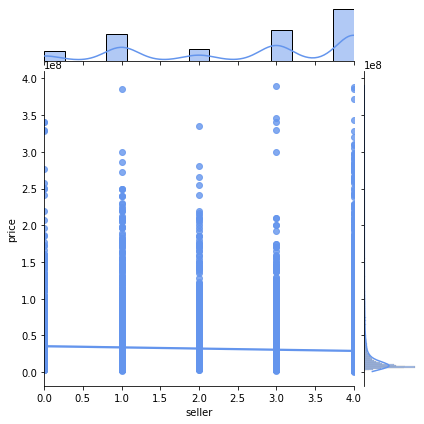

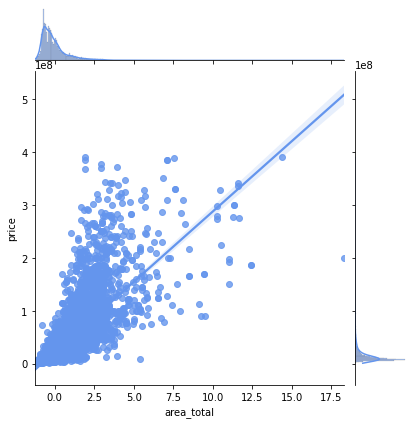

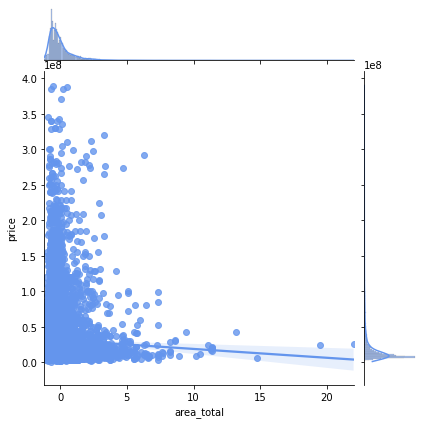

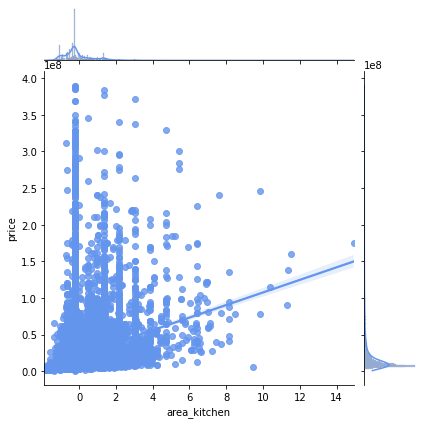

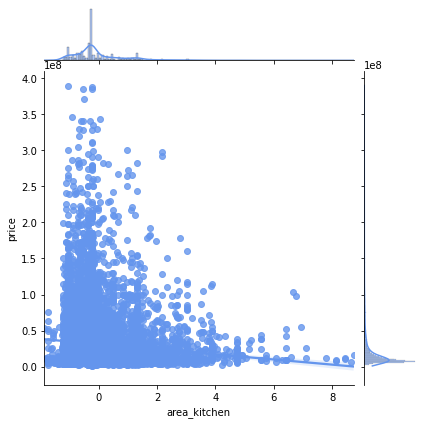

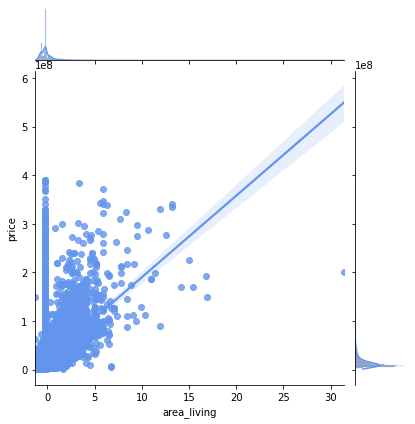

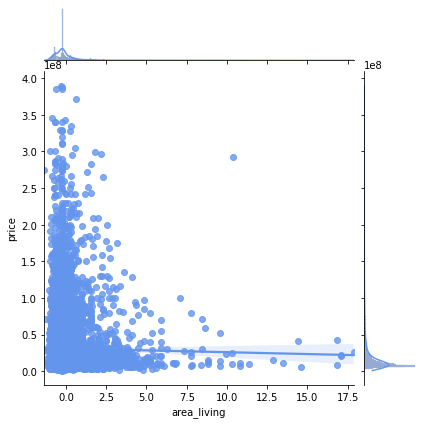

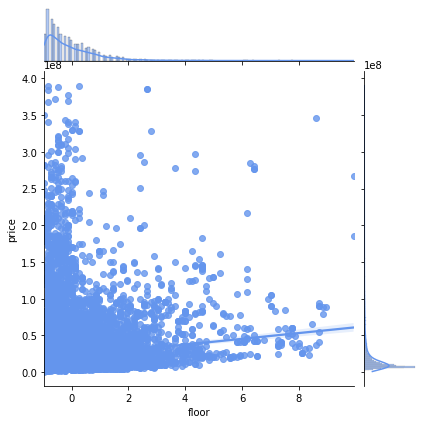

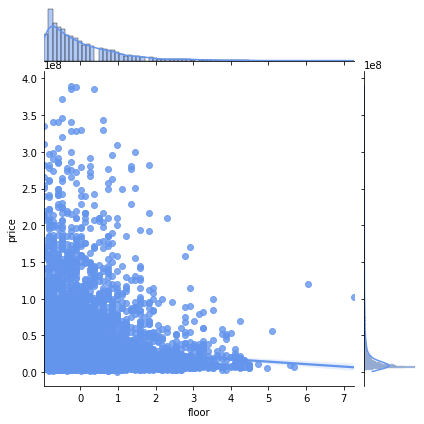

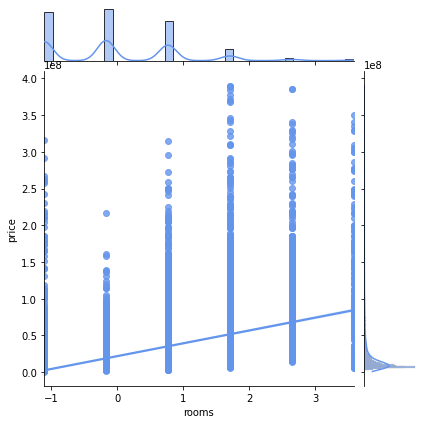

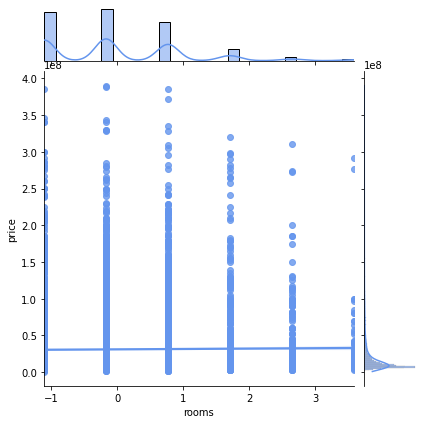

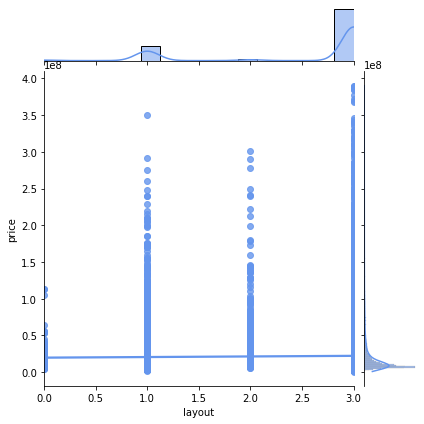

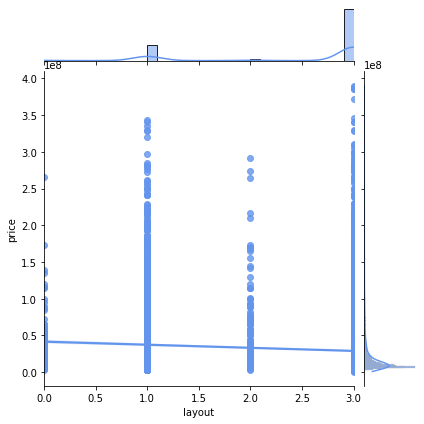

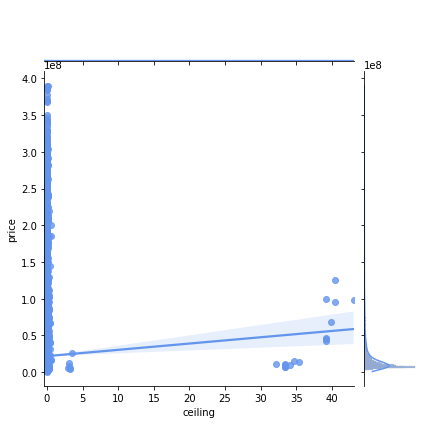

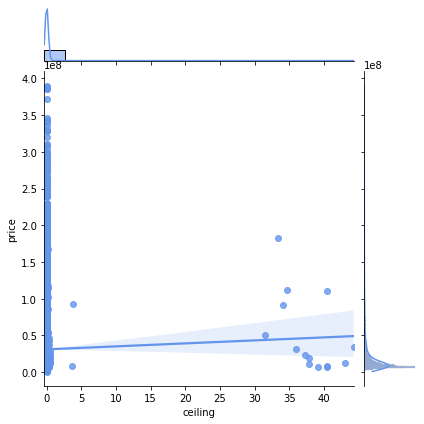

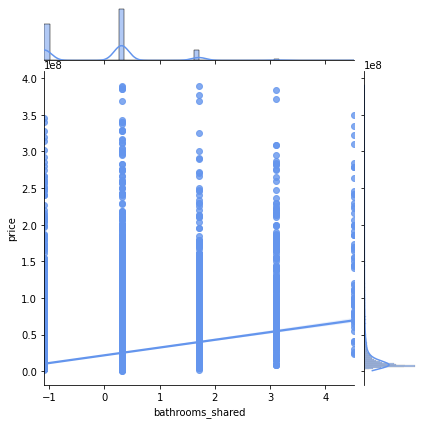

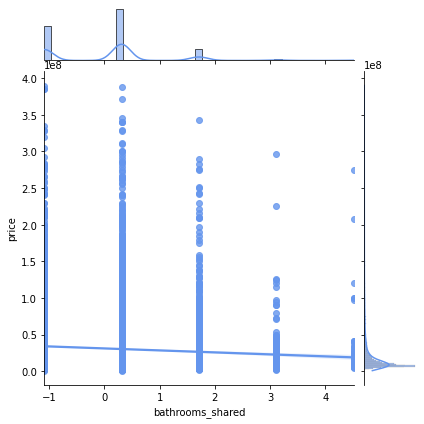

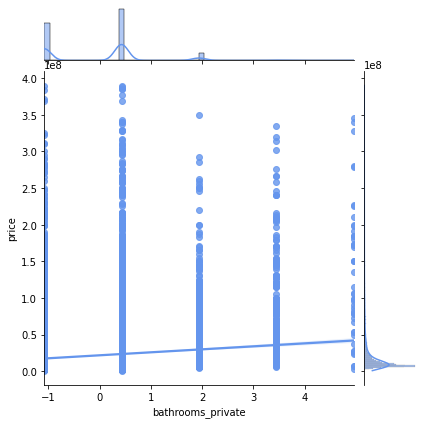

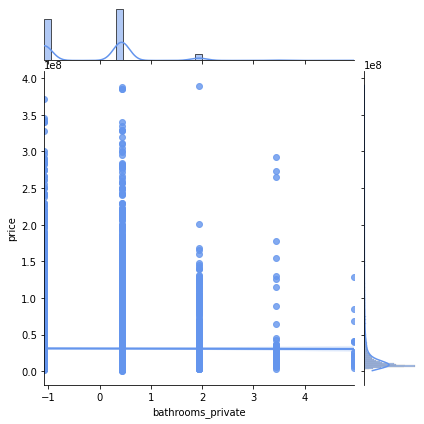

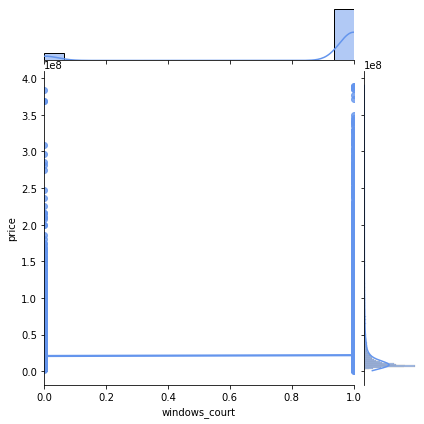

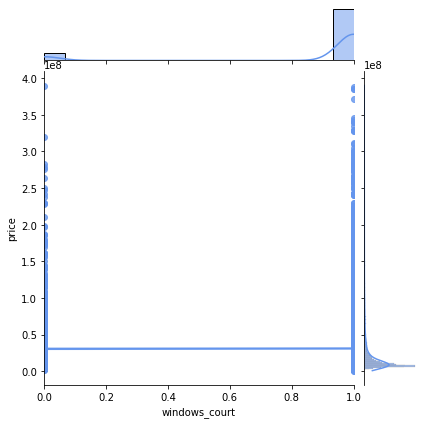

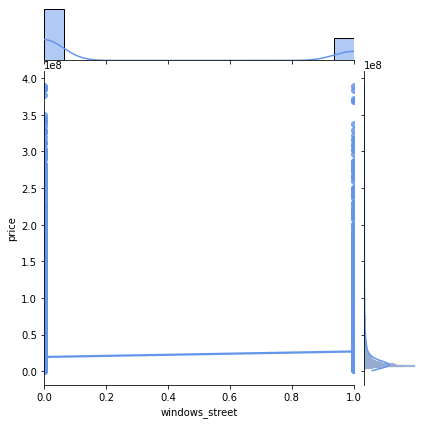

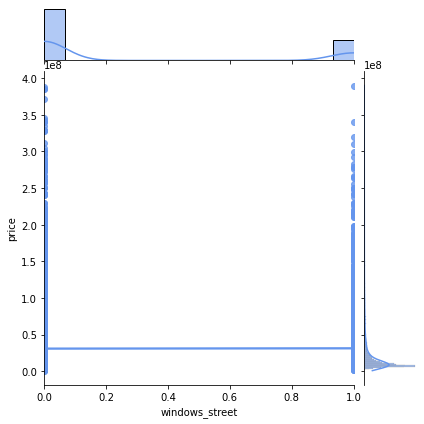

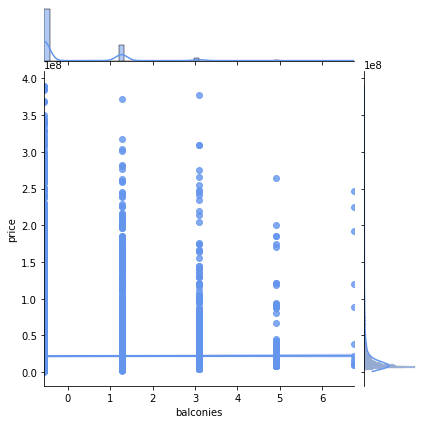

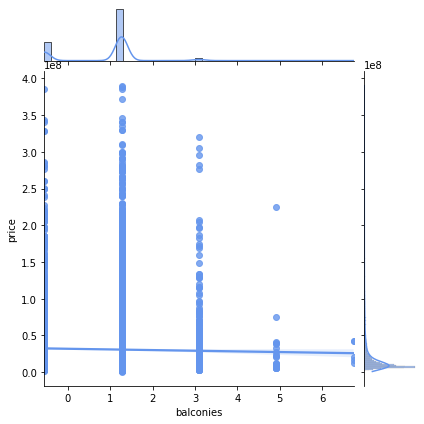

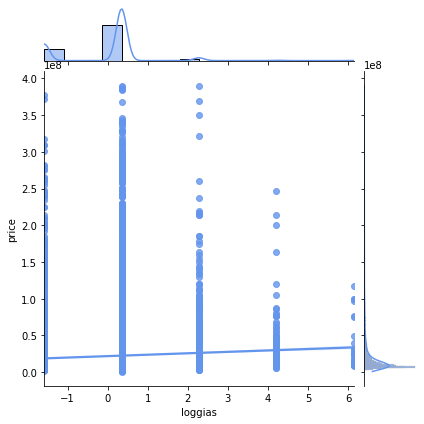

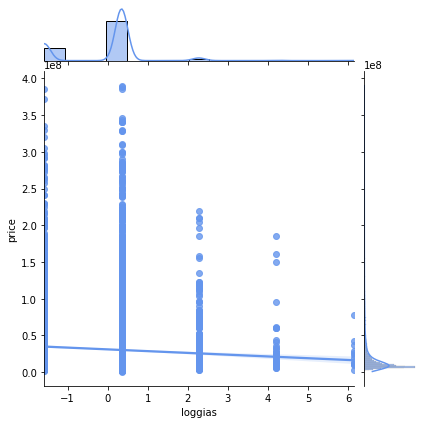

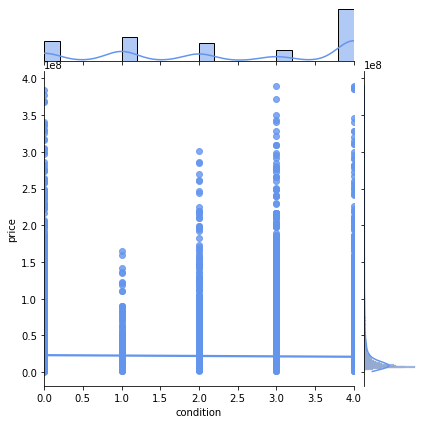

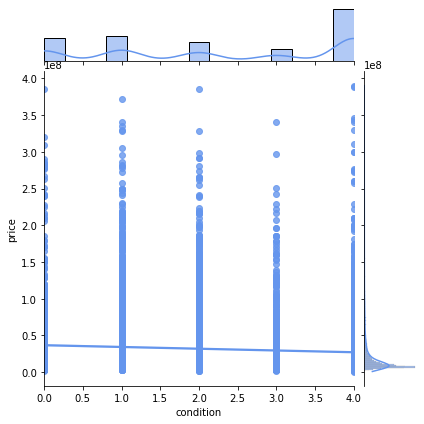

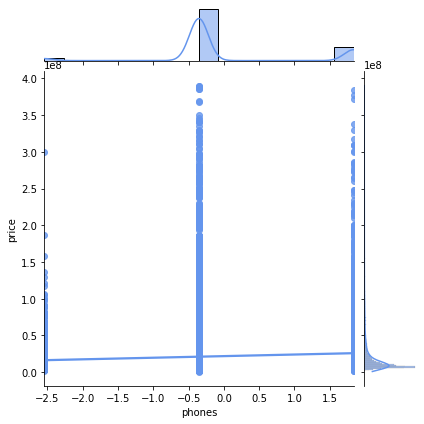

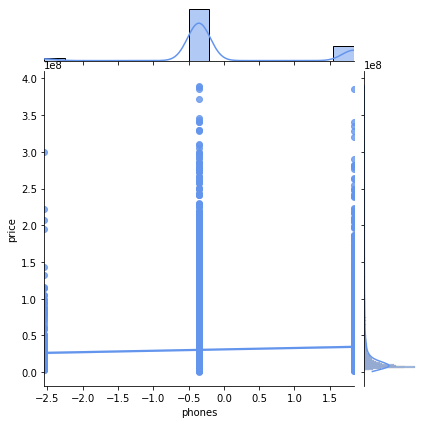

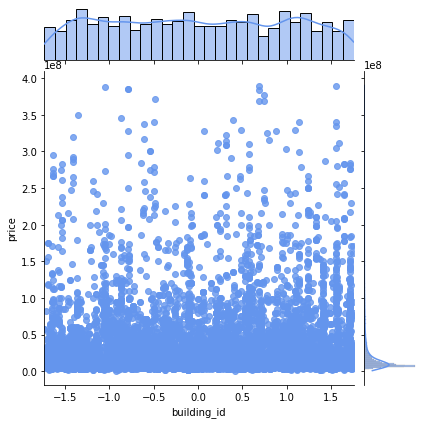

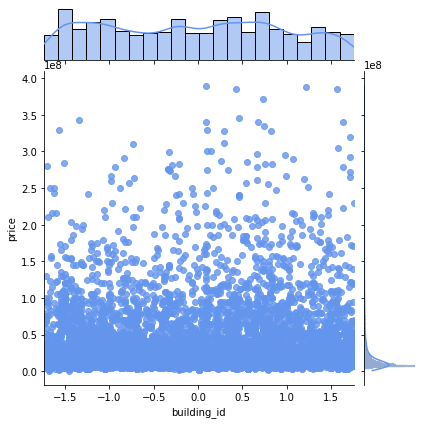

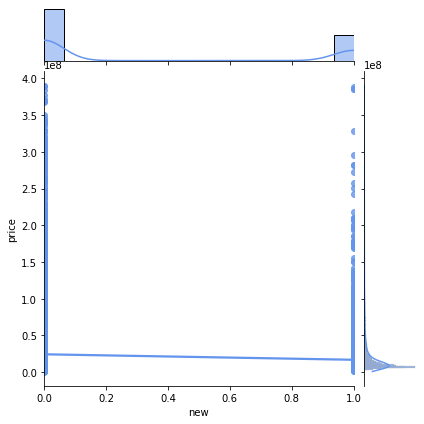

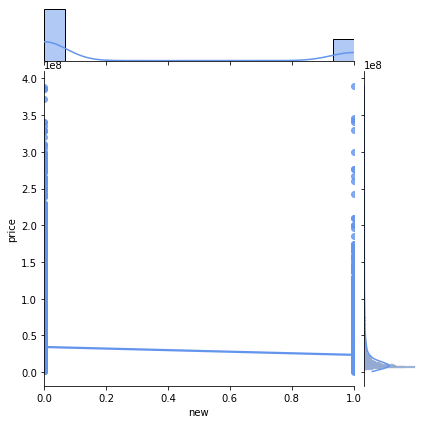

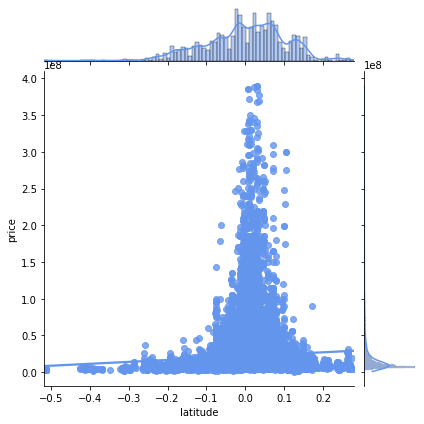

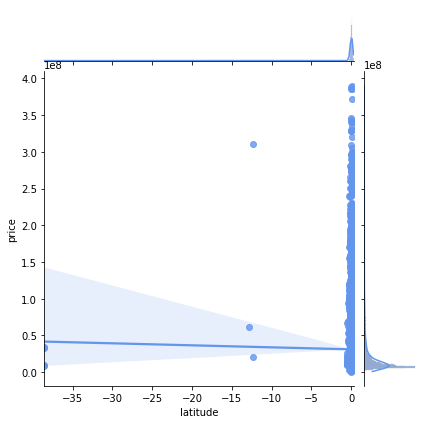

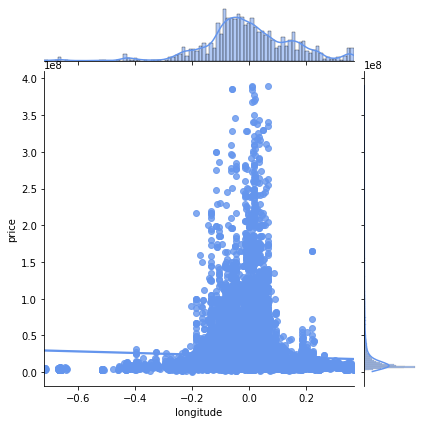

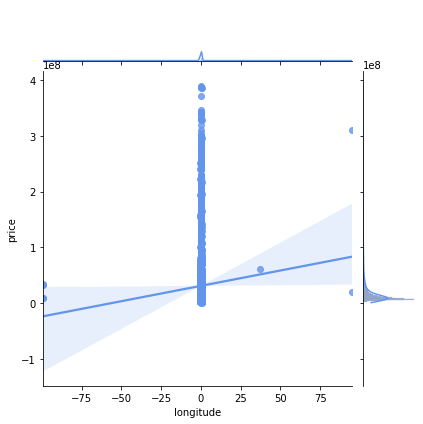

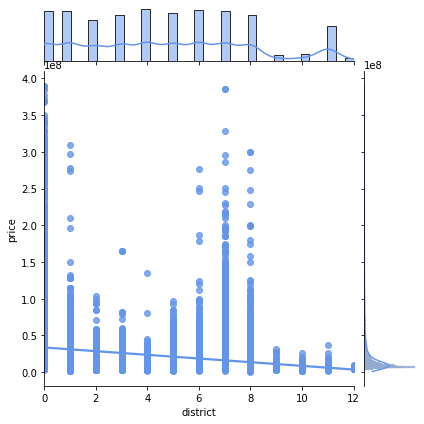

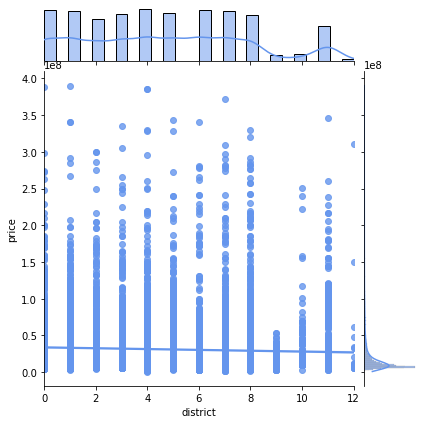

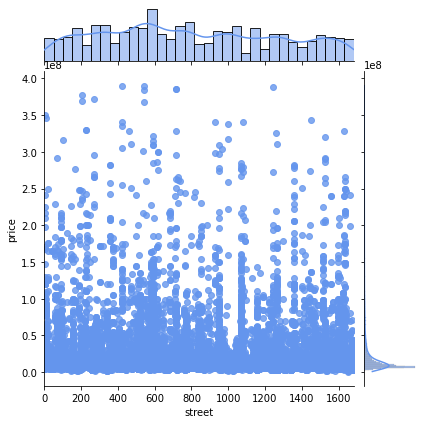

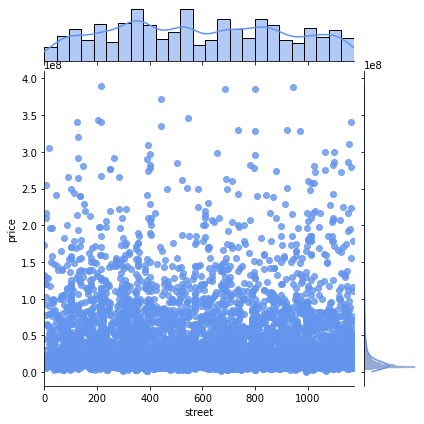

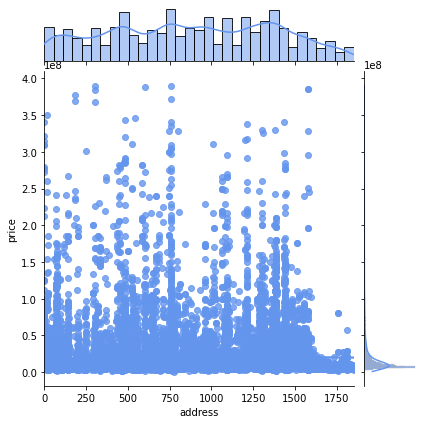

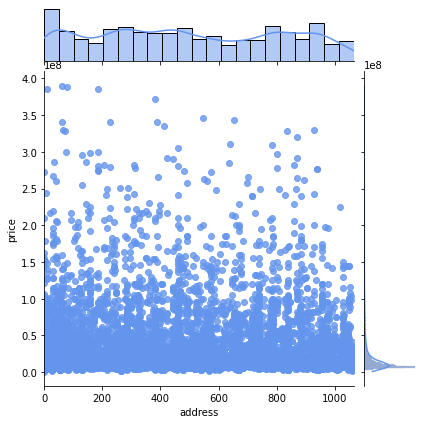

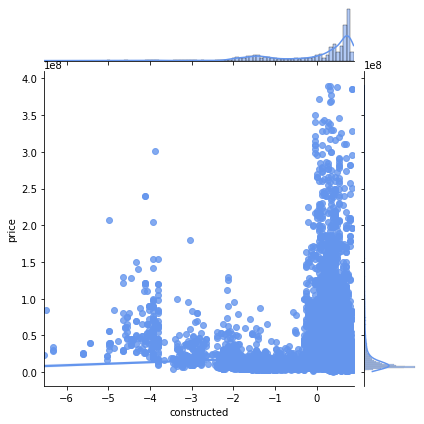

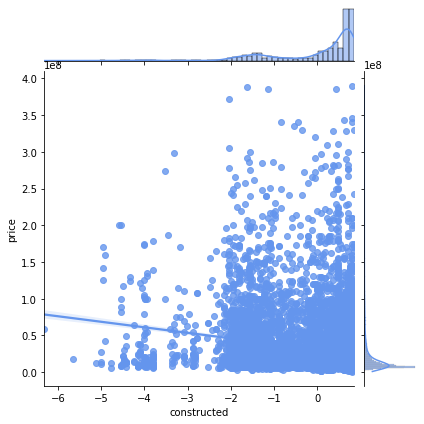

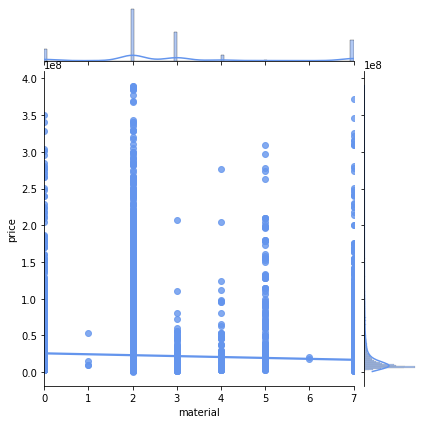

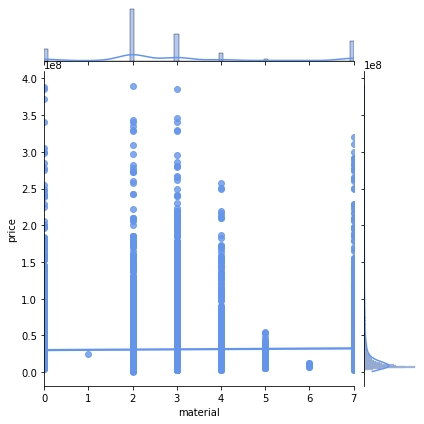

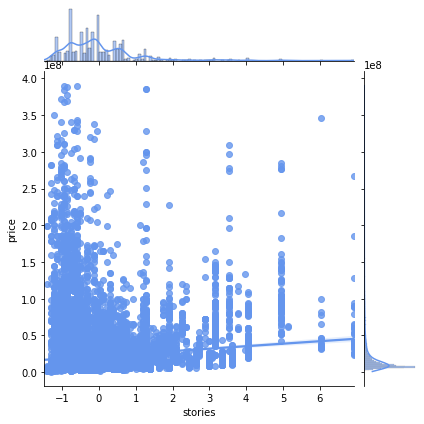

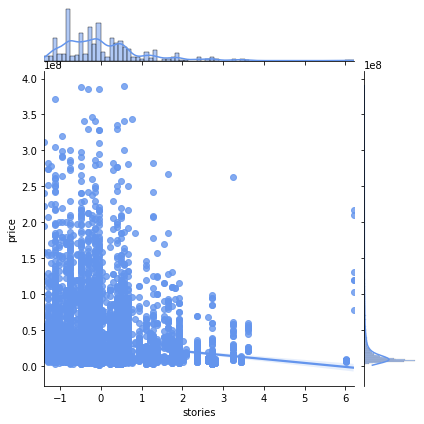

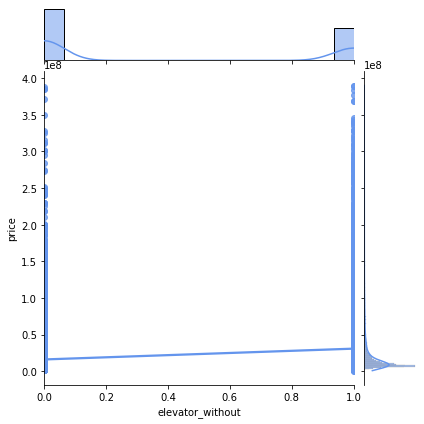

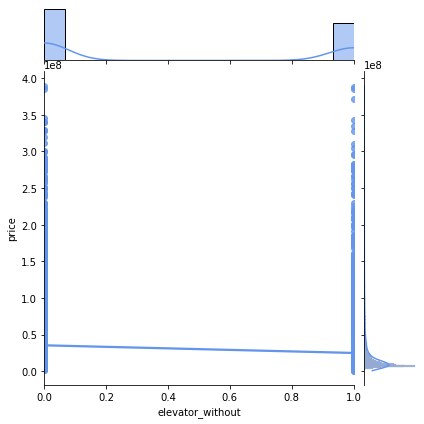

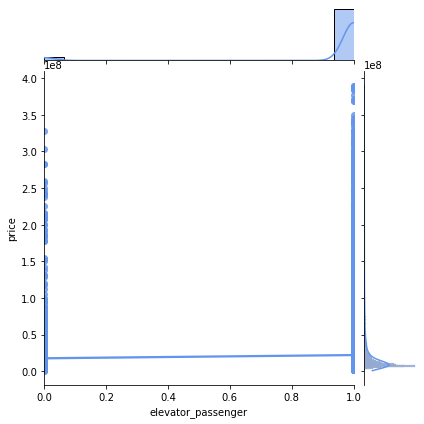

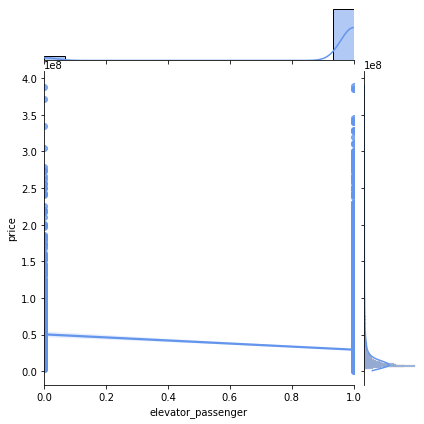

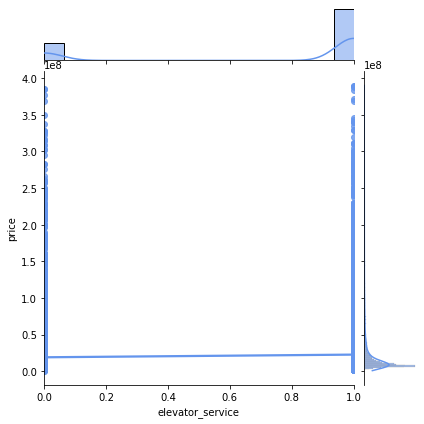

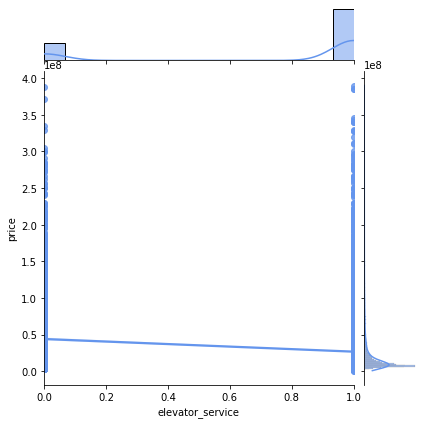

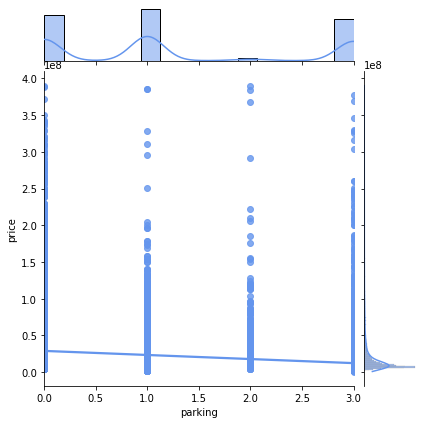

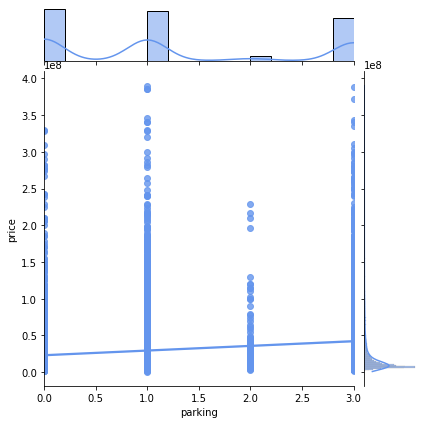

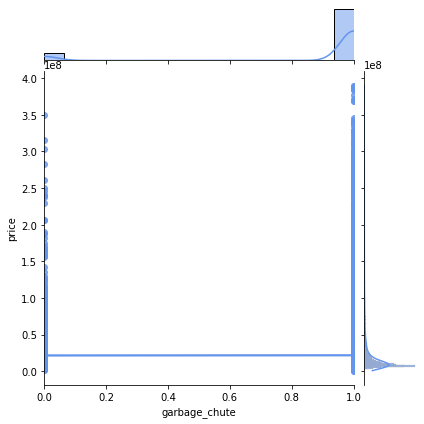

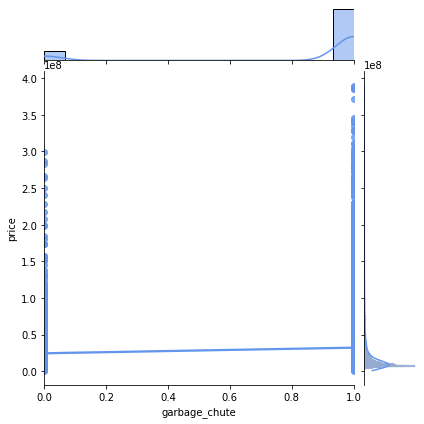

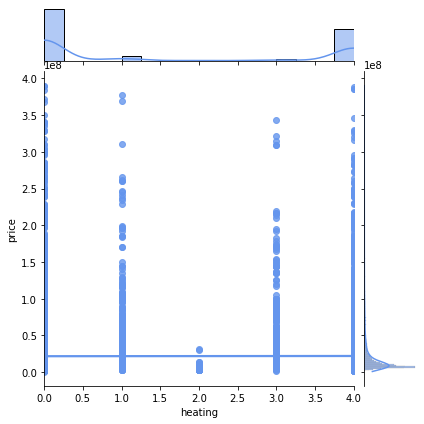

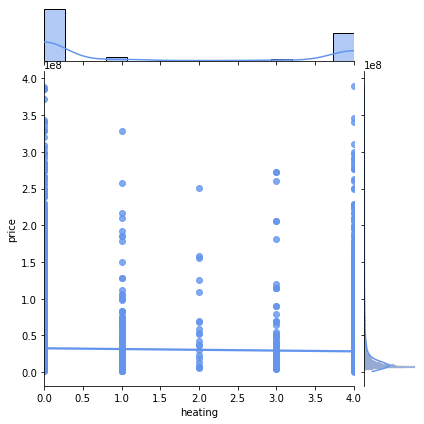

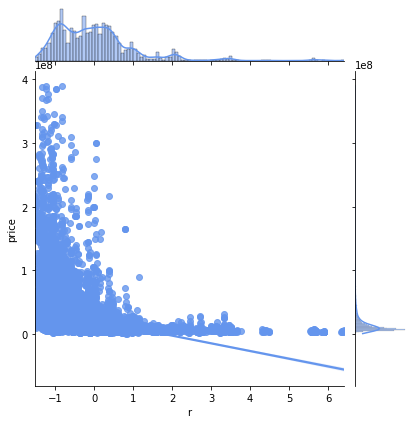

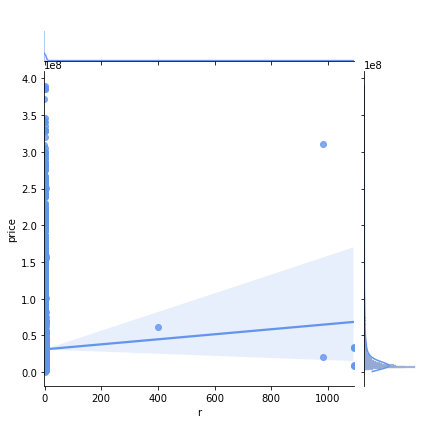

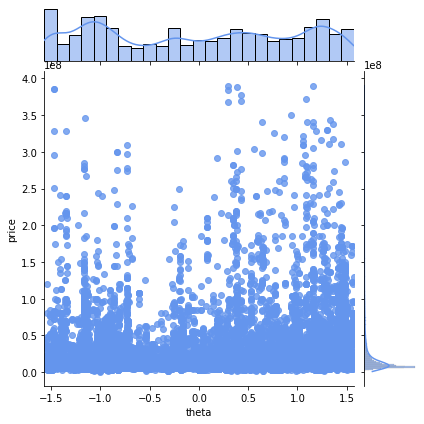

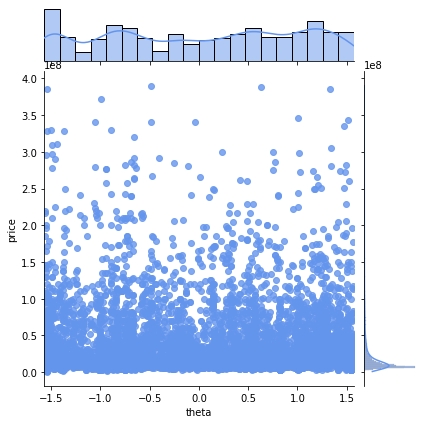

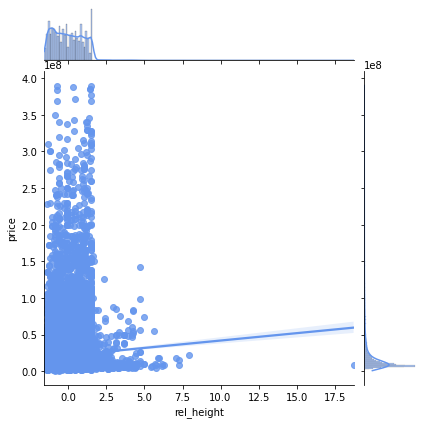

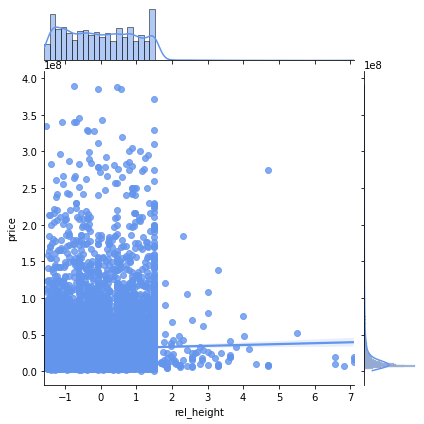

In [11]:
for col in x.columns[1:]:
    sns.jointplot(x=x.loc[:, col], y=y, kind="reg", color="#6495ED")
    sns.jointplot(x=test.loc[:, col], y=y, kind="reg", color="#6495ED")